In [3]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
%cd /content/drive/MyDrive/AI/Finger

/content/drive/MyDrive/AI/Finger


In [4]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training=train_data.flow_from_directory('/content/drive/MyDrive/AI/Finger/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 577 images belonging to 3 classes.


In [6]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/Finger/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 78 images belonging to 3 classes.


In [15]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [16]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 20 lần học (epochs), mỗi lần học thì chỉ học␣256 dữ liệu (batch_size)
history=model.fit(training,epochs=30,batch_size=512,verbose=1, validation_data=validation)

Epoch 1/30
19/19 [==============================] - 88s 5s/step - loss: 5.6791 - accuracy: 0.4298 - val_loss: 1.1089 - val_accuracy: 0.3846
Epoch 2/30
19/19 [==============================] - 86s 5s/step - loss: 0.9710 - accuracy: 0.5199 - val_loss: 1.0453 - val_accuracy: 0.3846
Epoch 3/30
19/19 [==============================] - 86s 5s/step - loss: 0.9225 - accuracy: 0.5269 - val_loss: 1.0167 - val_accuracy: 0.3974
Epoch 4/30
19/19 [==============================] - 86s 5s/step - loss: 0.8717 - accuracy: 0.5633 - val_loss: 1.0081 - val_accuracy: 0.4487
Epoch 5/30
19/19 [==============================] - 86s 5s/step - loss: 0.8853 - accuracy: 0.5633 - val_loss: 0.9243 - val_accuracy: 0.5000
Epoch 6/30
19/19 [==============================] - 86s 5s/step - loss: 0.8288 - accuracy: 0.6014 - val_loss: 1.0284 - val_accuracy: 0.4744
Epoch 7/30
19/19 [==============================] - 88s 5s/step - loss: 0.8424 - accuracy: 0.5945 - val_loss: 0.9997 - val_accuracy: 0.5000
Epoch 8/30
19/19 [==

In [17]:
# Lưu 
model.save("Finger.h5")
model_1=load_model('Finger.h5')

In [18]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.6114118695259094
Train Accuracy 0.7296360731124878


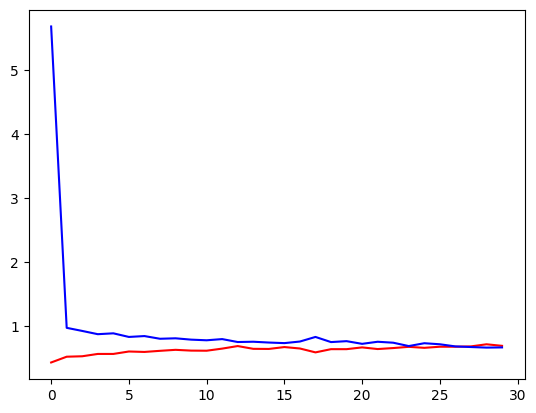

In [19]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

1/1 [==============================] - 0s 130ms/step
Richer


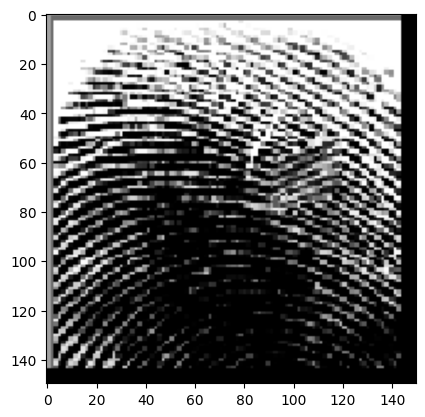

1/1 [==============================] - 0s 54ms/step
Longevity


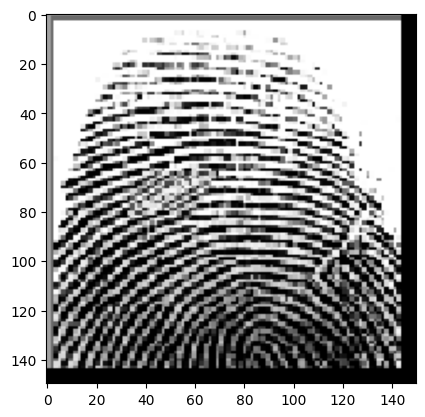

1/1 [==============================] - 0s 64ms/step
Richer


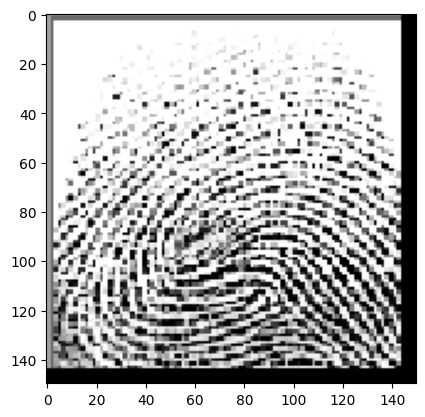

1/1 [==============================] - 0s 60ms/step
Richer


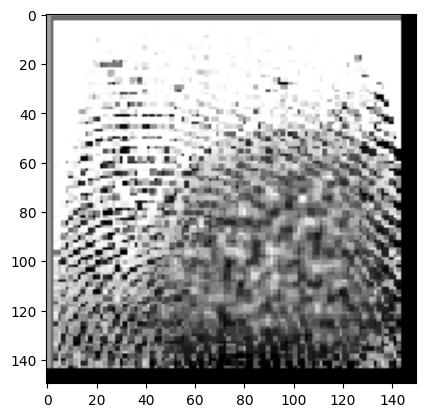

1/1 [==============================] - 0s 57ms/step
Longevity


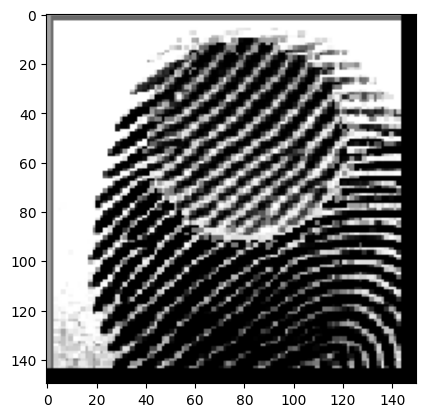

1/1 [==============================] - 0s 55ms/step
Longevity


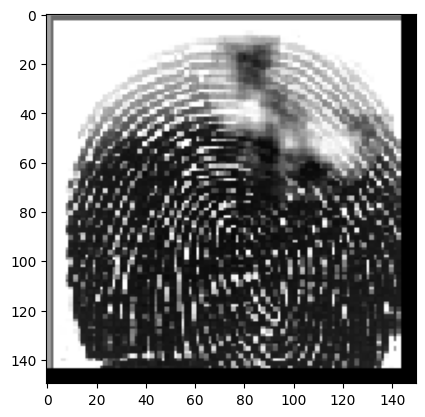

1/1 [==============================] - 0s 54ms/step
Longevity


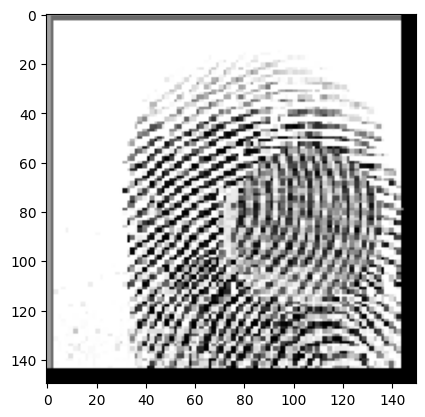

1/1 [==============================] - 0s 56ms/step
Longevity


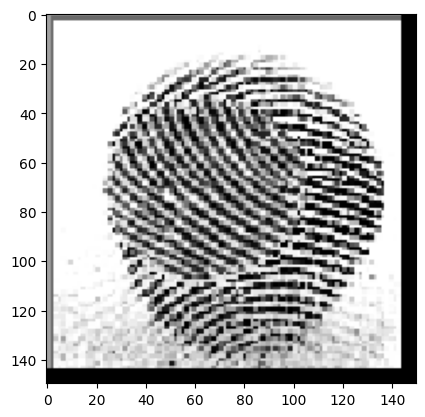

1/1 [==============================] - 0s 63ms/step
Richer


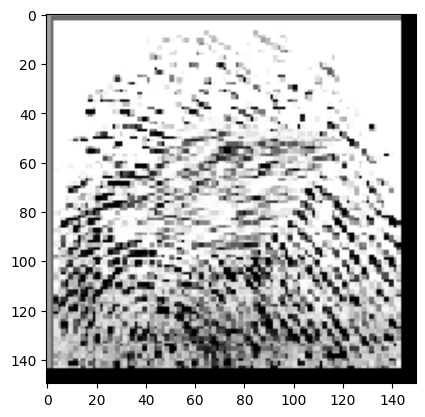

In [20]:
test="/content/drive/MyDrive/AI/Finger/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['HappyLife','Richer','Longevity']
  print(class_name[result])
  plt.show()